In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.datasets import UCR_UEA_datasets
from scipy.spatial.distance import cdist
from tslearn.metrics import cdist_dtw

In [2]:
def z_normalize(series):
    mu = np.mean(series)
    sigma = np.std(series)
    if sigma == 0:  # avoid divide by zero
        return np.zeros_like(series)
    return (series - mu) / sigma

In [3]:
def min_max_scale(series):
    return (series - np.min(series)) / (np.max(series) - np.min(series) + 1e-8)

In [4]:
ucr = UCR_UEA_datasets()
X_train, y_train, X_test, y_test = ucr.load_dataset("GunPoint")

# Single Time Series instance

A gun aiming time series

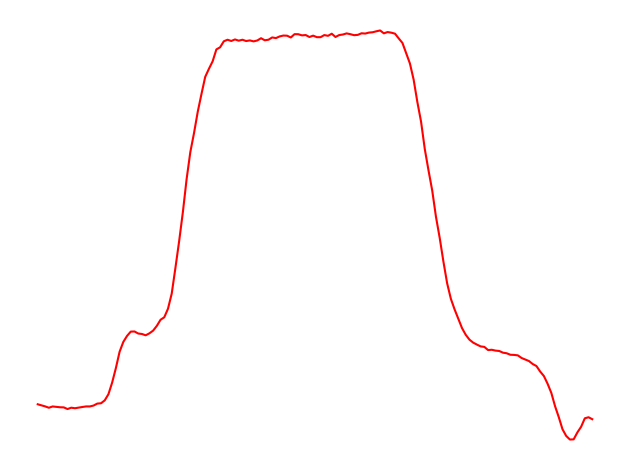

In [5]:
# gun
plt.plot(X_test[y_test == 1][0], color="red")
plt.axis("off")
plt.tight_layout()
plt.show()

An index figure pointing time series

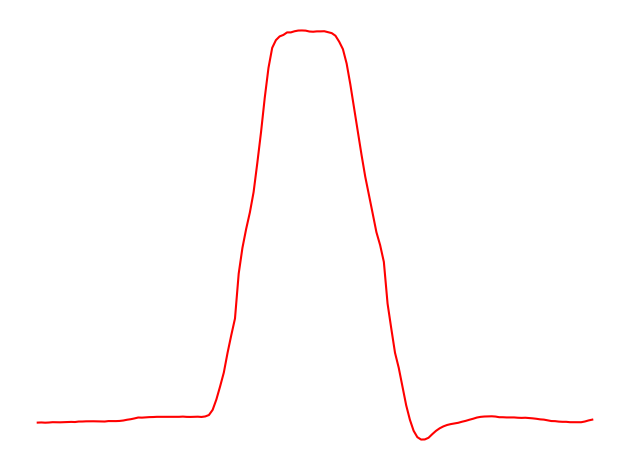

In [6]:
# pointing
plt.plot(X_test[y_test == 2][0], color="red")
plt.axis("off")
plt.tight_layout()
plt.show()

# Mean (Median) time series

Summary of the gun aiming time series by plotting the mean time series and median time series.

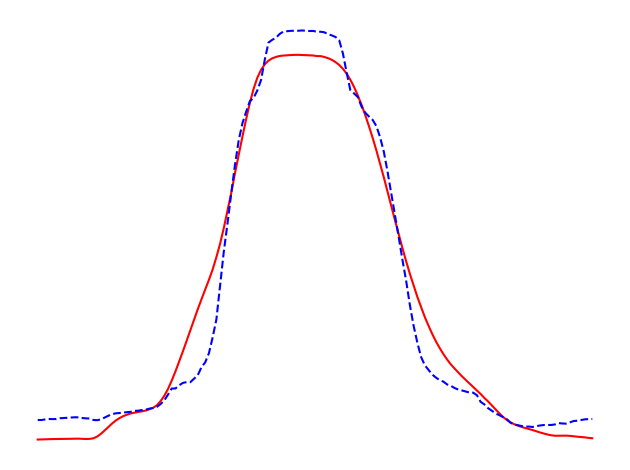

In [7]:
# gun
# Compute the mean time series
prototype_mean = np.mean(X_test[y_test == 1], axis=0)
# Compute the median time series
median_prototype = np.median(X_test[y_test == 1], axis=0)

# Plot the mean prototype
plt.plot(prototype_mean, label="Mean Prototype", color="red")
# Plot the median prototype
plt.plot(median_prototype, label="Median Prototype", color="blue", linestyle="--")
# plt.title("Idealized Prototype")
plt.xlabel("Time Step")
plt.ylabel("Value")
# plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()

Summary of the index figure pointing time series by plotting the mean time series and median time series.

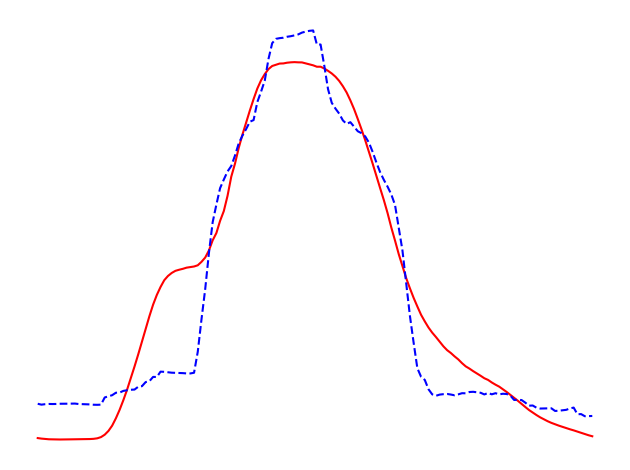

In [8]:
# pointing
# Compute the mean time series
prototype_mean = np.mean(X_test[y_test == 2], axis=0)
# Compute the median time series
median_prototype = np.median(X_test[y_test == 2], axis=0)

# Plot the mean prototype
plt.plot(prototype_mean, label="Mean Prototype", color="red")
# Plot the median prototype
plt.plot(median_prototype, label="Median Prototype", color="blue", linestyle="--")
# plt.title("Idealized Prototype")
plt.xlabel("Time Step")
plt.ylabel("Value")
# plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()

# Medoids

In [9]:
# Flatten from (n_samples, time_steps, 1) → (n_samples, time_steps)
X_train = X_train.squeeze()

# --- Z-normalize each series (for distance computation) ---
X_norm = np.array([z_normalize(x) for x in X_train])

# --- Compute medoid per class ---
medoids_ed = []
labels = np.unique(y_train)

for label in labels:
    class_series = X_norm[y_train == label]
    dist_matrix = cdist(class_series, class_series, metric="euclidean")
    medoid_index = np.argmin(dist_matrix.sum(axis=1))
    medoids_ed.append((label, class_series[medoid_index]))

# --- Min-max scale for plotting ---
medoids_ed_scaled = [(label, min_max_scale(series)) for label, series in medoids_ed]

In [10]:
# --- Compute medoid per class using DTW ---
medoids_dtw = []
labels = np.unique(y_train)

for label in labels:
    class_series = X_norm[y_train == label]
    distance_matrix = cdist_dtw(class_series)  # DTW pairwise distances
    medoid_index = np.argmin(distance_matrix.sum(axis=1))
    medoids_dtw.append((label, class_series[medoid_index]))

# --- Min-max scale for plotting ---
medoids_dtw_scaled = [(label, min_max_scale(series)) for label, series in medoids_dtw]

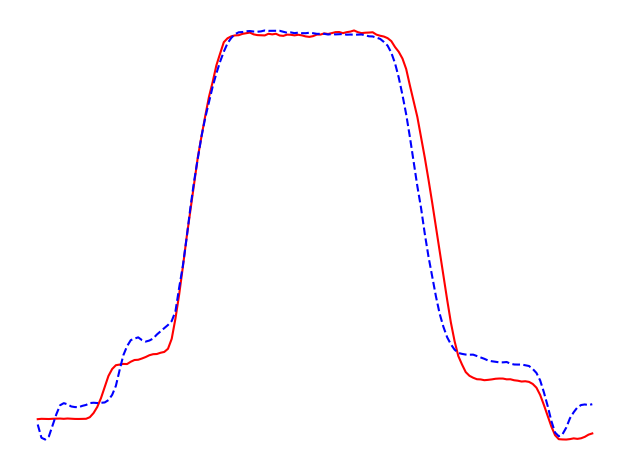

In [11]:
# Plot the mean prototype
plt.plot(medoids_ed_scaled[0][1], label="ED Medoid Gun", color="red")
# Plot the median prototype
plt.plot(medoids_dtw_scaled[0][1], label="DTW Medoid Gun", color="blue", linestyle="--")
# plt.title("Idealized Prototype")
plt.xlabel("Time Step")
plt.ylabel("Value")
# plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()

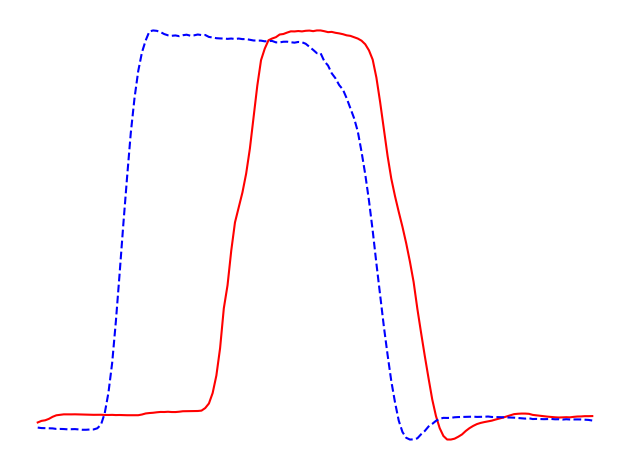

In [12]:
# Plot the mean prototype
plt.plot(medoids_ed_scaled[1][1], label="ED Medoid Gun", color="red")
# Plot the median prototype
plt.plot(medoids_dtw_scaled[1][1], label="DTW Medoid Gun", color="blue", linestyle="--")
# plt.title("Idealized Prototype")
plt.xlabel("Time Step")
plt.ylabel("Value")
# plt.legend()
plt.axis("off")
plt.tight_layout()
plt.show()

In [13]:
# # --- Plot ---
# plt.figure(figsize=(10, 4))
# for label, series in medoids_ed_scaled:
#     plt.plot(series, label=f"Class {label}", linewidth=2)
# plt.title(
#     "Representative (Medoid) Time Series per Class\nZ-normalized for distance, Min–Max scaled for visualization"
# )
# plt.xlabel("Time")
# plt.ylabel("Scaled Value")
# plt.legend()
# plt.tight_layout()
# plt.show()

In [14]:
# # --- Plot ---
# plt.figure(figsize=(10, 4))
# for label, series in medoids_dtw_scaled:
#     plt.plot(series, label=f"Class {label}", linewidth=2)
# plt.title(
#     "Representative (Medoid) Time Series per Class (DTW)\nZ-normalized for distance, Min–Max scaled for visualization"
# )
# plt.xlabel("Time")
# plt.ylabel("Scaled Value")
# plt.legend()
# plt.tight_layout()
# plt.show()

In [15]:
import datetime

print(f"This notebook was last run end-to-end on: {datetime.datetime.now()}\n")
###
###
###

This notebook was last run end-to-end on: 2025-09-09 21:51:03.262641

